In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import scale
from sklearn.svm import SVR

seasons = range(1993, 2023+1)

dfs = []
for season in seasons:
    df = pd.read_csv(f'data/player_mvps_{season}.csv')
    df = df.drop(labels=['Player', 'Tm'], axis=1)
    df['Won'] = df.index == 0
    dfs.append(df)
dfs[0].head()

,Age,First,Pts Won,Pts Max,Share,G,MP,PTS,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48,Won
0,29,59.0,835.0,980,0.852,76,37.6,25.6,12.2,5.1,1.6,1.0,0.520,0.305,0.765,14.4,0.242,True
1,30,22.0,647.0,980,0.660,82,39.5,26.1,13.0,3.5,1.8,4.2,0.529,0.000,0.779,15.8,0.234,False
2,29,13.0,565.0,980,0.577,78,39.3,32.6,6.7,5.5,2.8,0.8,0.495,0.352,0.837,17.2,0.270,False
3,30,4.0,359.0,980,0.366,81,37.1,24.2,12.1,1.9,0.9,2.0,0.503,0.143,0.719,10.6,0.170,False
4,33,0.0,54.0,980,0.055,71,37.3,29.9,6.8,3.2,1.0,0.4,0.468,0.380,0.828,10.5,0.191,False


In [2]:
df = pd.concat(dfs).reset_index(drop=True)
df.head()

,Age,First,Pts Won,Pts Max,Share,G,MP,PTS,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48,Won
0,29,59.0,835.0,980,0.852,76,37.6,25.6,12.2,5.1,1.6,1.0,0.520,0.305,0.765,14.4,0.242,True
1,30,22.0,647.0,980,0.660,82,39.5,26.1,13.0,3.5,1.8,4.2,0.529,0.000,0.779,15.8,0.234,False
2,29,13.0,565.0,980,0.577,78,39.3,32.6,6.7,5.5,2.8,0.8,0.495,0.352,0.837,17.2,0.270,False
3,30,4.0,359.0,980,0.366,81,37.1,24.2,12.1,1.9,0.9,2.0,0.503,0.143,0.719,10.6,0.170,False
4,33,0.0,54.0,980,0.055,71,37.3,29.9,6.8,3.2,1.0,0.4,0.468,0.380,0.828,10.5,0.191,False


In [3]:
df.isna().any()

Age        False
First      False
Pts Won    False
Pts Max    False
Share      False
G          False
MP         False
PTS        False
TRB        False
AST        False
STL        False
BLK        False
FG%        False
3P%         True
FT%        False
WS         False
WS/48      False
Won        False
dtype: bool

In [4]:
df.replace(np.NaN, 0, inplace=True)

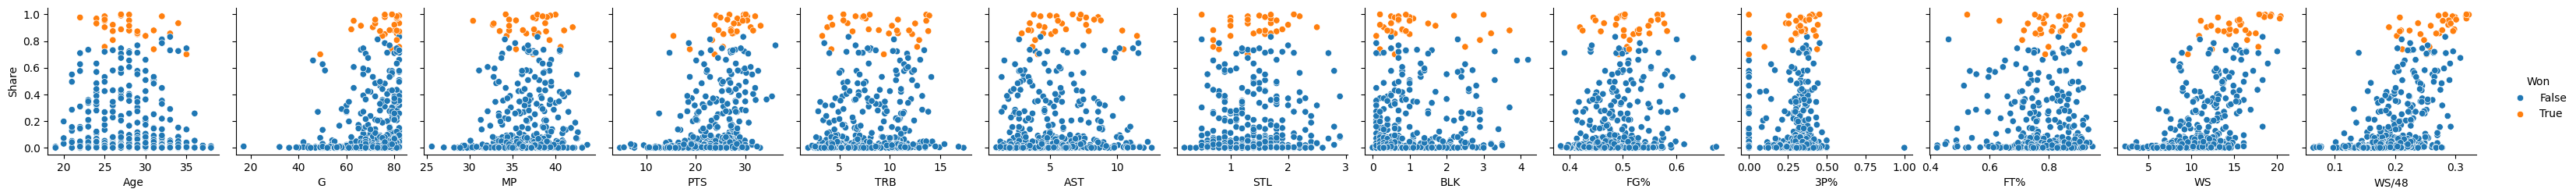

In [5]:
columns = df.columns.tolist()
sns.pairplot(df, x_vars=[columns[0]] + columns[5:-1], y_vars=['Share'], hue='Won')
plt.show()

In [6]:
X = df[[columns[0]] + columns[5:-1]].to_numpy()
X

array([[29.   , 76.   , 37.6  , ...,  0.765, 14.4  ,  0.242],
       [30.   , 82.   , 39.5  , ...,  0.779, 15.8  ,  0.234],
       [29.   , 78.   , 39.3  , ...,  0.837, 17.2  ,  0.27 ],
       ...,
       [25.   , 73.   , 33.4  , ...,  0.78 ,  7.4  ,  0.146],
       [26.   , 68.   , 35.   , ...,  0.829,  8.7  ,  0.175],
       [23.   , 61.   , 31.9  , ...,  0.748,  6.   ,  0.148]])

In [7]:
y = df['Share'].to_numpy()
y.shape

(462,)

In [8]:
X = scale(X)
X

array([[ 0.33563825,  0.34068262,  0.4362748 , ..., -0.1730315 ,
         1.09736228,  0.97627999],
       [ 0.58942691,  0.91130027,  1.06418433, ..., -0.02770391,
         1.52082981,  0.80668369],
       [ 0.33563825,  0.5308885 ,  0.99808859, ...,  0.57436751,
         1.94429734,  1.56986704],
       ...,
       [-0.67951639,  0.05537379, -0.95173574, ..., -0.01732337,
        -1.01997536, -1.05887559],
       [-0.42572773, -0.42014092, -0.42296982, ...,  0.49132317,
        -0.62675551, -0.44408901],
       [-1.1870937 , -1.08586151, -1.44745379, ..., -0.34950071,
        -1.44344288, -1.01647652]])

In [9]:
svr = SVR(epsilon=0.01)
svr.fit(X, y)
svr.score(X, y)

0.7526870174765798

In [10]:
mlp = MLPRegressor(random_state=42, max_iter=1000)
mlp.fit(X, y)
mlp.score(X, y)

0.7273496840575706

In [11]:
r1 = LinearRegression()
r2 = RandomForestRegressor(n_estimators=100, random_state=42)
r3 = KNeighborsRegressor()

er1 = VotingRegressor([('lr', r1), ('rf', r2), ('r3', r3)])
er1.fit(X, y)
er1.score(X, y)

0.7556416052903483

In [12]:
reg1 = GradientBoostingRegressor(random_state=42)
reg2 = RandomForestRegressor(n_estimators=100, random_state=42)
reg3 = LinearRegression()

er2 = VotingRegressor(estimators=[('gb', reg1), ('rf', reg2), ('lr', reg3)])
er2.fit(X, y)
er2.score(X, y)

0.820276387774329

In [13]:
df_2023 = dfs[-1]
df_2023.head()

,Age,First,Pts Won,Pts Max,Share,G,MP,PTS,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48,Won
0,28,73.0,915.0,1000,0.915,66,34.6,33.1,10.2,4.2,1.0,1.7,0.548,0.330,0.857,12.3,0.259,True
1,27,15.0,674.0,1000,0.674,69,33.7,24.5,11.8,9.8,1.3,0.7,0.632,0.383,0.822,14.9,0.308,False
2,28,12.0,606.0,1000,0.606,63,32.1,31.1,11.8,5.7,0.8,0.8,0.553,0.275,0.645,8.6,0.204,False
3,24,0.0,280.0,1000,0.280,74,36.9,30.1,8.8,4.6,1.1,0.7,0.466,0.350,0.854,10.5,0.185,False
4,24,0.0,46.0,1000,0.046,68,35.5,31.4,4.8,5.5,1.6,1.0,0.510,0.345,0.905,11.4,0.226,False


In [14]:
X_2023 = df_2023[[columns[0]] + columns[5:-1]].to_numpy()
X_2023 = scale(X_2023)
X_2023.shape

(13, 13)

In [15]:
np.maximum(0., svr.predict(X_2023))

array([0.36671771, 0.59023637, 0.35959066, 0.1102726 , 0.01223735,
       0.05040542, 0.01933291, 0.09119781, 0.        , 0.04404466,
       0.0151315 , 0.        , 0.        ])

In [16]:
np.maximum(0., mlp.predict(X_2023))

array([0.50486226, 0.68086237, 0.34468621, 0.20837439, 0.11937935,
       0.1441126 , 0.08479949, 0.0926318 , 0.        , 0.        ,
       0.        , 0.        , 0.02078016])

In [17]:
np.maximum(0., er1.predict(X_2023))

array([0.42411104, 0.63163625, 0.27946319, 0.0672276 , 0.14237982,
       0.00719703, 0.17822387, 0.22286108, 0.0915646 , 0.15146115,
       0.        , 0.        , 0.06219551])

In [18]:
np.maximum(0., er2.predict(X_2023))

array([0.44616928, 0.57634109, 0.28102434, 0.07402166, 0.20279147,
       0.        , 0.21769916, 0.22327977, 0.07334079, 0.19878744,
       0.        , 0.        , 0.05614582])